In [ ]:
import pandas as pd
from google.colab import files
upd= files.upload()

Saving dataset.csv to dataset (3).csv


In [ ]:
#liberaries used 
import pandas as pd
from sklearn.model_selection import train_test_split
from google.colab import files
from scipy import stats
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from math import sqrt
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df= pd.read_csv('dataset.csv')
df

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3,6,27000,Petrol,Dealer,Manual,0
1,sx4,2013,5,10,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7,10,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,3,4,5200,Petrol,Dealer,Manual,0
4,swift,2014,5,7,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,10,12,33988,Diesel,Dealer,Manual,0
297,brio,2015,4,6,60000,Petrol,Dealer,Manual,0
298,city,2009,3,11,87934,Petrol,Dealer,Manual,0
299,city,2017,12,12,9000,Diesel,Dealer,Manual,0


In [ ]:
df['Selling_Price']= df['Selling_Price']*100000
df['Present_Price']= df['Present_Price']*100000

In [ ]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [ ]:
print(df.dropna(inplace=True))

None


In [ ]:
df.head(10)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,335000,559000,27000,Petrol,Dealer,Manual,0
1,sx4,2013,475000,954000,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,725000,985000,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,285000,415000,5200,Petrol,Dealer,Manual,0
4,swift,2014,460000,687000,42450,Diesel,Dealer,Manual,0
5,vitara brezza,2018,925000,983000,2071,Diesel,Dealer,Manual,0
6,ciaz,2015,675000,812000,18796,Petrol,Dealer,Manual,0
7,s cross,2015,650000,861000,33429,Diesel,Dealer,Manual,0
8,ciaz,2016,875000,889000,20273,Diesel,Dealer,Manual,0
9,ciaz,2015,745000,892000,42367,Diesel,Dealer,Manual,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 23.5+ KB


In [ ]:
final_data= df.drop(['Car_Name'], axis=1)

In [ ]:
final_data= pd.get_dummies(final_data,drop_first=True)

In [ ]:
final_data['Current_year']= 2022
final_data['no_of_years']= final_data['Current_year']- final_data['Year']

In [ ]:
final_data.drop(['Year'],axis=1,inplace=True)
final_data.drop(['Current_year'],axis=1,inplace=True)

### **Outliers Removal**

In [ ]:
from scipy import stats
final_data[(np.abs(stats.zscore(final_data)) < 3).all(axis=1)]

,Selling_Price,Present_Price,Kms_Driven,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual,no_of_years
0,335000,559000,27000,0,0,1,0,1,8
1,475000,954000,43000,0,1,0,0,1,9
2,725000,985000,6900,0,0,1,0,1,5
3,285000,415000,5200,0,0,1,0,1,11
4,460000,687000,42450,0,1,0,0,1,8
...,...,...,...,...,...,...,...,...,...
296,950000,1160000,33988,0,1,0,0,1,6
297,400000,590000,60000,0,0,1,0,1,7
298,335000,1100000,87934,0,0,1,0,1,13
299,1150000,1250000,9000,0,1,0,0,1,5


### **Save the final Dataset in Car.csv dataset**

In [ ]:
from google.colab import files 
upd= files.upload()


In [ ]:
final_data.to_csv('car.csv')

In [ ]:
from sklearn.model_selection import train_test_split
# split into train test sets
x= final_data.iloc[:,1:]
y= final_data.iloc[:,0]
X_train, X_test, Y_train, Y_test = train_test_split(x,y, test_size=0.5, random_state= 1)
print(X_train.shape,  X_test.shape,Y_train.shape, Y_test.shape)

(150, 8) (151, 8) (150,) (151,)


In [ ]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Selling_Price           301 non-null    float64
 1   Present_Price           301 non-null    float64
 2   Kms_Driven              301 non-null    int64  
 3   Owner                   301 non-null    int64  
 4   Fuel_Type_Diesel        301 non-null    uint8  
 5   Fuel_Type_Petrol        301 non-null    uint8  
 6   Seller_Type_Individual  301 non-null    uint8  
 7   Transmission_Manual     301 non-null    uint8  
 8   no_of_years             301 non-null    int64  
dtypes: float64(2), int64(3), uint8(4)
memory usage: 15.3 KB


# **Linear Regression**

In [ ]:
from sklearn.linear_model import LinearRegression
model= LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [ ]:
b1= model.coef_[0]
b2= model.coef_[1]
b3= model.coef_[2]
model.coef_[3]= -(model.coef_[3])
b4= model.coef_[3]
b5= model.coef_[4]
b6= model.coef_[5]
b7= model.coef_[6]
b8= model.coef_[7]

## **Displaying the values**

In [ ]:
print("intercept= ",model.intercept_)
inter= model.intercept_
coeff_df = pd.DataFrame(model.coef_, X_train.columns, columns=['Coefficient'])
coeff_df

intercept=  753720.0599607297


,Coefficient
Present_Price,0
Kms_Driven,-0
Owner,4191
Fuel_Type_Diesel,-92866
Fuel_Type_Petrol,-92866
Seller_Type_Individual,-115109
Transmission_Manual,-188091
no_of_years,-39788


In [ ]:
x1= int(input("Enter the Showroom price: "))
x2= int(input("Enter the km driven: "))
x3= int(input("Are you owner or dealer: (0 for owner and 1 for deLER)"))
x4= int(input("Is it diesel or petrol? (0 for petrol and 1 for diesel)"))
if(x4==1):
  x5=0
else:
  x5=1
x6= int(input("ENter the seller type(1 for dealer and 0 for individual)"))
x7= int(input("ENter the transmission type: (1 for manual and 0 for automatic)"))
x8= int(input("How old is the car: "))

y_ans= inter + b1*x1 + b2*x2 + b3*x3  + b4*x4 + b5*x5  + b6*x6 + b8*x8 + b7*x7
y_ans= "{:.0f}".format(y_ans)
print("Estimated value is : ",y_ans,"ruppes")

Enter the Showroom price: 450000
Enter the km driven: 2345
Are you owner or dealer: (0 for owner and 1 for deLER)0
Is it diesel or petrol? (0 for petrol and 1 for diesel)1
ENter the seller type(1 for dealer and 0 for individual)0
ENter the transmission type: (1 for manual and 0 for automatic)1
How old is the car: 4
Estimated value is :  500684 ruppes


In [ ]:
final_data

,Selling_Price,Present_Price,Kms_Driven,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual,no_of_years
0,335000,559000,27000,0,0,1,0,1,8
1,475000,954000,43000,0,1,0,0,1,9
2,725000,985000,6900,0,0,1,0,1,5
3,285000,415000,5200,0,0,1,0,1,11
4,460000,687000,42450,0,1,0,0,1,8
...,...,...,...,...,...,...,...,...,...
296,950000,1160000,33988,0,1,0,0,1,6
297,400000,590000,60000,0,0,1,0,1,7
298,335000,1100000,87934,0,0,1,0,1,13
299,1150000,1250000,9000,0,1,0,0,1,5


### **Using Prediction function in test**

In [ ]:
Y_pred= abs(model.predict(X_test))
pd.options.display.float_format = '{:.1f}'.format
df1 = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_pred})
df1

,Actual,Predicted
285,740000.0,771523.7
248,400000.0,295615.0
150,50000.0,47747.4
217,315000.0,413468.6
107,125000.0,56623.6
...,...,...
137,65000.0,26471.9
24,290000.0,277661.2
236,310000.0,414643.0
134,65000.0,188148.6


## **Checking Errors**

In [ ]:
from sklearn.metrics import mean_squared_error
print(mean_squared_error(Y_test, Y_pred))

33313450794.55333


In [ ]:
Y_train= Y_train.astype('int')
Y_test= Y_test.astype('int')

In [ ]:
from sklearn.metrics import r2_score
r2_score(Y_test, Y_pred)

0.8616940760514893

In [ ]:
# Calculate the absolute errors
error1 = abs(Y_pred -Y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(error1), 2), 'degrees.')

Mean Absolute Error: 117151.7 degrees.


In [ ]:
# Calculate mean absolute percentage error (MAPE)
mape1 = 100 * (error1 / Y_test)
# Calculate and display accuracy
accuracy1 = 100 - np.mean(mape1)
print('Accuracy:', round(accuracy1, 2), '%.')

Accuracy: 29.09 %.


**Well this accuracy it is not pretty much Good!!**

So...we will try some other regression to find out the accuracy

### **Visualisation**

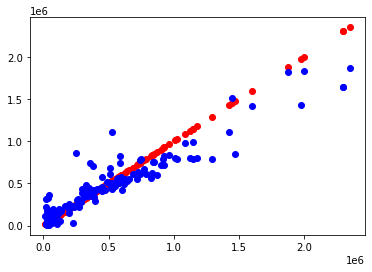

In [ ]:
from matplotlib import pyplot as plt
plt.scatter(Y_test,Y_test,color='red')
plt.scatter(Y_test,Y_pred,color='blue')
plt.show()

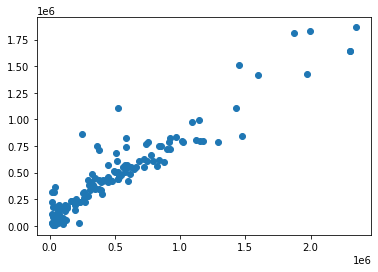

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(Y_test,Y_pred)

## **Now using Decision Tree Regression**

In [ ]:
#importing some librarires
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [ ]:
final_data1= final_data

In [ ]:
X1= final_data1.values[:,1:]
Y1= final_data1.values[:,0]

In [ ]:
x1_train, x1_test, y1_train, y1_test= train_test_split(X1, Y1, test_size= 0.3, random_state=100)

### **Removing continues label**

In [ ]:
y1_train= y1_train.astype('int')
y1_test= y1_test.astype('int')

In [ ]:
final_data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Selling_Price           301 non-null    float64
 1   Present_Price           301 non-null    float64
 2   Kms_Driven              301 non-null    int64  
 3   Owner                   301 non-null    int64  
 4   Fuel_Type_Diesel        301 non-null    uint8  
 5   Fuel_Type_Petrol        301 non-null    uint8  
 6   Seller_Type_Individual  301 non-null    uint8  
 7   Transmission_Manual     301 non-null    uint8  
 8   no_of_years             301 non-null    int64  
dtypes: float64(2), int64(3), uint8(4)
memory usage: 15.3 KB


In [ ]:
clf_entropy= DecisionTreeClassifier(criterion="entropy", random_state=1)
pd.options.display.float_format = '{:.0f}'.format
clf_entropy.fit(x1_train, y1_train)

DecisionTreeClassifier(criterion='entropy', random_state=1)

In [ ]:
y1_pred= clf_entropy.predict(x1_test)

In [ ]:
df4 = pd.DataFrame({'Actual': y1_test, 'Predicted': y1_pred})
df4

,Actual,Predicted
0,12000,20000
1,325000,195000
2,114999,105000
3,90000,105000
4,265000,400000
...,...,...
86,615000,450000
87,745000,685000
88,65000,110000
89,75000,78000


### **Visualisation**

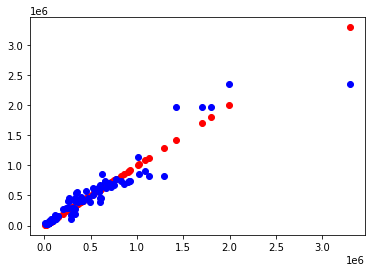

In [ ]:
from matplotlib import pyplot as plt
plt.scatter(y1_test,y1_test,color='red')
plt.scatter(y1_test,y1_pred,color='blue')
plt.show()

## **Errors**

In [ ]:
# Calculate the absolute errors
error2 = abs(y1_pred - y1_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(error2), 2), 'degrees.')

Mean Absolute Error: 93670.33 degrees.


In [ ]:
# Calculate mean absolute percentage error (MAPE)
mape11 = 100 * (error2 / y1_test)
# Calculate and display accuracy
accuracy11 = 100 - np.mean(mape11)
print('Accuracy:', round(accuracy11, 2), '%.')

Accuracy: 76.26 %.


### **Well this accuracy is pretty much Good than the Linear Regression!!**

Now...Lets try some other regression to find out the more accuracy

# **Now Using Random Forest Regression**

### **Data Preparation**

In [ ]:
final_data2= final_data

### **Features and Targets and Convert Data to Arrays**

In [ ]:
# Use numpy to convert to arrays
import numpy as np
# Labels are the values we want to predict
labels = np.array(final_data2['Selling_Price'])
# Remove the labels from the features
# axis 1 refers to the columns
final_data2= final_data2.drop('Selling_Price', axis = 1)
# Saving feature names for later use
final_data_list = list(final_data2.columns)
# Convert to numpy array
final_data2 = np.array(final_data2)

In [ ]:
print('The shape of our features is:', final_data2.shape)

The shape of our features is: (301, 8)


In [ ]:
# Split the data into training and testing sets
x2_train, x2_test, y2_train, y2_test = train_test_split(final_data2, labels, test_size = 0.1, random_state = 42)
print('Training Features Shape:', x2_train.shape)
print('Training Labels Shape:', y2_train.shape)
print('Testing Features Shape:', x2_test.shape)
print('Testing Labels Shape:', y2_test.shape)

Training Features Shape: (270, 8)
Training Labels Shape: (270,)
Testing Features Shape: (31, 8)
Testing Labels Shape: (31,)


In [ ]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(x2_train, y2_train);

In [ ]:
# Use the forest's predict method on the test data
predictions = rf.predict(x2_test)
# Calculate the absolute errors
errors = abs(predictions - y2_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 32468.06 degrees.


### **Lets Test**

In [ ]:
one_predict= rf.predict([[750000, 22000, 0,0,1,1,1,5]])
print(one_predict)

[568315.]


In [ ]:
df2 = pd.DataFrame({'Actual': y2_test, 'Predicted': predictions})
df2.head(10)

,Actual,Predicted
0,35000,43566
1,1011000,1061632
2,495000,496855
3,15000,22764
4,695000,706058
5,745000,680541
6,110000,110855
7,50000,57187
8,45000,46772
9,600000,674816


In [ ]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y2_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 88.75 %.


That looks **pretty good!** Our model has learned how to predict the used car price with **88.75% accuracy**.

### **Visualizing a Single Decision Treet**

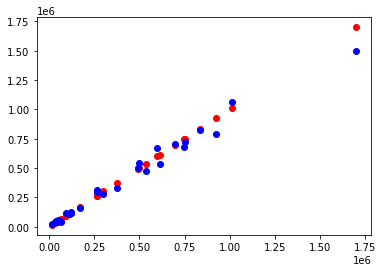

In [ ]:
from matplotlib import pyplot as plt
plt.scatter(y2_test, y2_test,color='red')
plt.scatter(y2_test,predictions,color='blue')
plt.show()

### **Lets Check the Lasso Regression too**

# **Lasso Regression**

In [ ]:
## Load requried packages
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split

In [ ]:
final_data3= final_data

In [ ]:
x3= final_data3.iloc[:,1:]
y3= final_data3.iloc[:,0]
X3_train, X3_test, Y3_train, Y3_test = train_test_split(x3,y3, test_size=0.2, random_state= 1)
print(X3_train.shape,  X3_test.shape,Y3_train.shape, Y3_test.shape)

(240, 8) (61, 8) (240,) (61,)


In [ ]:
## Build the lasso model with alpha
model_lasso = Lasso(alpha=1)
model_lasso.fit(X3_train, Y3_train)
pred_train_lasso= model_lasso.predict(X3_train)
Y3_pred= model_lasso.predict(X3_test)

In [ ]:
## Evaluate the lasso model
#print(np.sqrt(mean_squared_error(Y3_train,pred_train_lasso)))
#print(r2_score(Y3_train, pred_train_lasso))
print("Mean Squared Error: ", np.sqrt(mean_squared_error(Y3_test,Y3_pred)))
print("R square: ", r2_score(Y3_test, Y3_pred))

Mean Squared Error:  172688.50052605846
R square:  0.8625377153097278


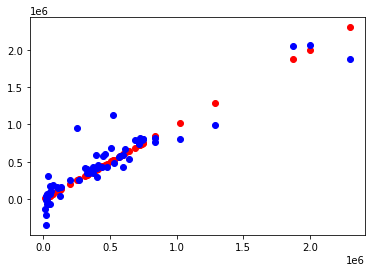

In [ ]:
plt.scatter(Y3_test,Y3_test,color='red')
plt.scatter(Y3_test,Y3_pred,color='blue')
plt.show()

In [ ]:
errors3 = abs(Y3_pred - Y3_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors3), 2), 'degrees.')

Mean Absolute Error: 109990.05 degrees.


### **Accuracy**

In [ ]:
# Calculate mean absolute percentage error (MAPE)
mape111 = 100 * (errors3 / Y3_test)
# Calculate and display accuracy
accuracy111 = abs(100 - np.mean(mape111))
print('Accuracy:', round(accuracy111, 2), '%.')

Accuracy: 27.03 %.


## **Check**

In [ ]:
df4 = pd.DataFrame({'Actual': Y3_test, 'Predicted': abs(Y3_pred)})
df4.head(10)

,Actual,Predicted
285,740000,786261
248,400000,296824
150,50000,59028
217,315000,421333
107,125000,48322
206,575000,582052
132,75000,195686
73,265000,255804
288,840000,770871
157,48000,97875


## **Visualisation**

# **Plotting All the models Regression Graph**

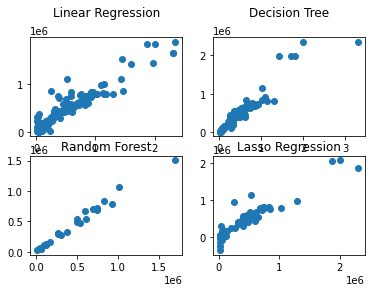

In [ ]:
# importing libraries
import matplotlib.pyplot as plt
import numpy as np
import math
  
# Initialise the subplot function using number of rows and columns
figure, axis = plt.subplots(2, 2)
  
# For Linear Regression
axis[0, 0].scatter(Y_test, Y_pred)
axis[0, 0].set_title("Linear Regression\n")
  
# For Decision Tree Regression
axis[0, 1].scatter(y1_test, y1_pred)
axis[0, 1].set_title("Decision Tree\n")

# For Random Forest Regression
axis[1, 0].scatter(y2_test, predictions)
axis[1, 0].set_title("Random Forest")
  
# For Lasso Regression
axis[1, 1].scatter(Y3_test, Y3_pred)
axis[1, 1].set_title("Lasso Regression")
  
# Combine all the operations and display
plt.show()

So we found that the Accuracy of **Random forest > Decision Tree > Linear regression > Lasso regression**

# **Now its time to make a website based on this model**